In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup_weather = soup(html, "html.parser")

In [5]:
# Extract all rows of data

# Find the table element
table = soup_weather.find("table")

# Find all rows in the table (except for the header row)
rows = table.find_all("tr")[1:]

# Print out the contents of each row
for row in rows:
    cols = row.find_all("td")
    for col in cols:
        print(col.text, end="\t")
    print()

2	2012-08-16	10	155	6	-75.0	739.0	
13	2012-08-17	11	156	6	-76.0	740.0	
24	2012-08-18	12	156	6	-76.0	741.0	
35	2012-08-19	13	157	6	-74.0	732.0	
46	2012-08-20	14	157	6	-74.0	740.0	
57	2012-08-21	15	158	6	-78.0	740.0	
68	2012-08-22	16	158	6	-77.0	740.0	
79	2012-08-23	17	159	6	-76.0	742.0	
112	2012-08-27	21	161	6	-74.0	741.0	
114	2012-08-28	22	162	6	-74.0	742.0	
123	2012-08-29	23	162	6	-75.0	741.0	
134	2012-08-30	24	163	6	-75.0	742.0	
145	2012-08-31	25	163	6	-75.0	743.0	
156	2012-09-01	26	164	6	-76.0	745.0	
163	2012-09-02	27	164	6	-75.0	743.0	
170	2012-09-03	28	165	6	-75.0	745.0	
171	2012-09-04	29	166	6	-75.0	747.0	
172	2012-09-05	30	166	6	-74.0	747.0	
173	2012-09-06	31	167	6	-74.0	745.0	
175	2012-09-08	33	168	6	-73.0	748.0	
176	2012-09-10	34	168	6	-73.0	748.0	
177	2012-09-11	35	169	6	-73.0	749.0	
178	2012-09-12	36	169	6	-73.0	750.0	
179	2012-09-13	37	170	6	-73.0	750.0	
180	2012-09-14	38	171	6	-73.0	750.0	
181	2012-09-15	39	171	6	-75.0	751.0	
182	2012-09-16	40	172	6	-75.0	753.0	
183	2012-0

In [6]:
# Create an empty list to hold the rows
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])



In [7]:
# Define the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [8]:
# Print the shape of the DataFrame
print(df.shape)

(1867, 7)


In [9]:
# Print the column names of the DataFrame
print(df.columns)


Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


In [10]:
# Examine data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [13]:
# 1. How many months are there on Mars?

month_counts = df['month'].value_counts().sort_index()
print(month_counts)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?

num_sols = df['sol'].nunique()
print(f"There are {num_sols} Martian days worth of data in the dataset.")


There are 1867 Martian days worth of data in the dataset.


In [15]:
average_low_temp = df.groupby('month')['min_temp'].mean()
print(average_low_temp)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


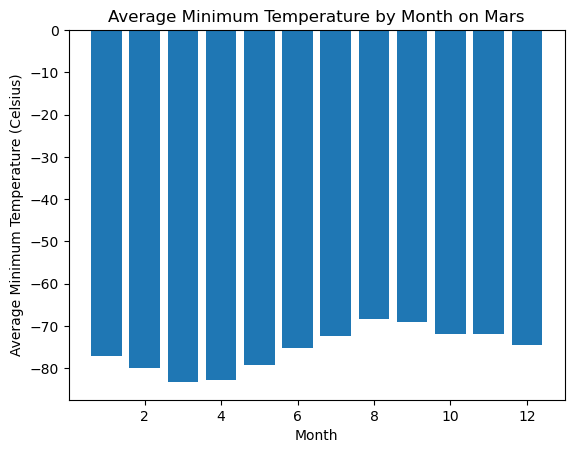

In [16]:
# Plot the average temperature by month

# Group the data by month and compute the mean of the min_temp column for each group
temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a bar chart of the results
plt.bar(temp_by_month.index, temp_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

The coldest month at Curiosity's location is month 3.
The hottest month at Curiosity's location is month 8.


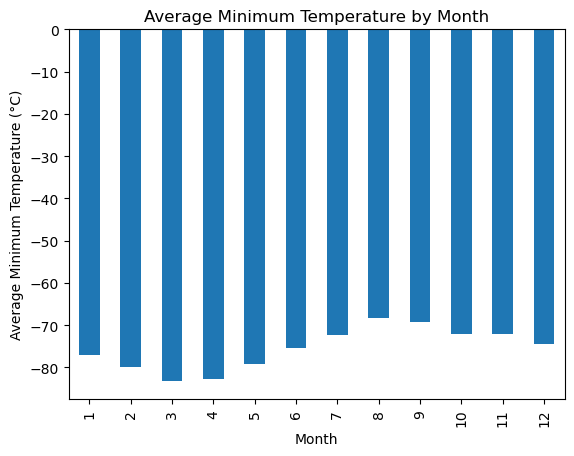

In [17]:
# Identify the coldest and hottest months in Curiosity's location


# Group the data by month and calculate the average minimum temperature for each month
monthly_temps = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
monthly_temps.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Identify the coldest and hottest months
coldest_month = monthly_temps.idxmin()
hottest_month = monthly_temps.idxmax()

print(f"The coldest month at Curiosity's location is month {coldest_month}.")
print(f"The hottest month at Curiosity's location is month {hottest_month}.")



In [18]:
average_pressure = df.groupby('month')['pressure'].mean()
print(average_pressure)



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


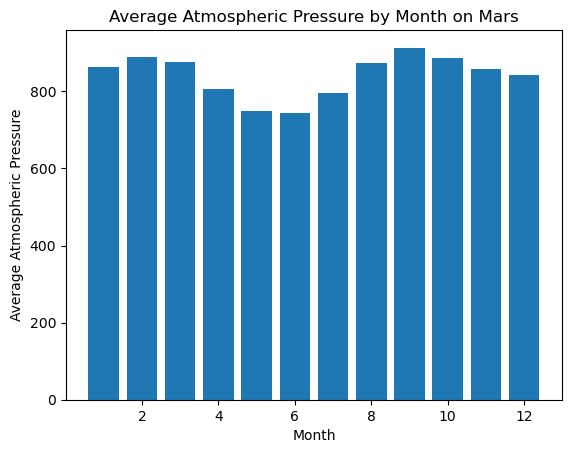

In [19]:
import matplotlib.pyplot as plt

# Group the data by month and compute the mean of the pressure column for each group
pressure_by_month = df.groupby('month')['pressure'].mean()

# Create a bar chart of the results
plt.bar(pressure_by_month.index, pressure_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show()


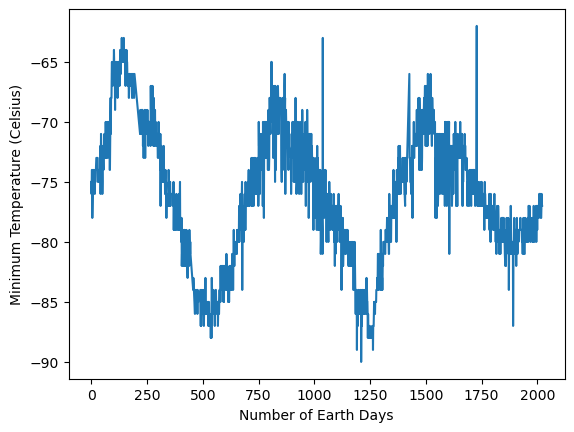

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

import matplotlib.pyplot as plt

# Convert the terrestrial_date column to a datetime object
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Calculate the number of Earth days since the first observation
df['earth_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Create a line plot of the daily minimum temperature against the number of Earth days
plt.plot(df['earth_days'], df['min_temp'])
plt.xlabel('Number of Earth Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()



In [21]:
# Write the data to a CSV

df.to_csv('mars_weather.csv', index=False)



In [22]:
browser.quit()